In [10]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import operator
%matplotlib inline

In [11]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self, formats = 'str'):
        if formats == 'str':
            return "(" + str(self.x) + "," + str(self.y) + ")"
        elif formats == 'array':
            return [int(self.x),int(self.y)]

In [12]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                
                fromCity = self.route[i]
                toCity = None
                
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                    
                    
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [55]:
def create_starting_population():
    cityList = []
    
    for i in range(0,25):
        cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
        
    return cityList

cityList = create_starting_population()
popSize = 4
mutationRate = 0.01
iters = 1
eliteSize = int(popSize * 0.2)


In [56]:
cityList

[(108,113),
 (20,23),
 (99,119),
 (87,70),
 (34,186),
 (63,24),
 (127,31),
 (175,120),
 (94,75),
 (146,83),
 (168,168),
 (44,91),
 (57,191),
 (97,62),
 (130,13),
 (68,133),
 (22,31),
 (57,151),
 (165,54),
 (17,88),
 (97,134),
 (183,3),
 (187,13),
 (24,124),
 (103,156)]

In [57]:
def createRoute(cityList):
    ### Случайная подвыборка из списка нодов
    route = random.sample(cityList, len(cityList))
    return route

route = createRoute(cityList)
print(route)

[(57,151), (94,75), (127,31), (97,62), (103,156), (68,133), (108,113), (87,70), (20,23), (97,134), (183,3), (168,168), (63,24), (24,124), (17,88), (22,31), (130,13), (34,186), (99,119), (165,54), (57,191), (187,13), (146,83), (44,91), (175,120)]


In [58]:
def initialPopulation(popSize, cityList):
    
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

pop_sample = initialPopulation(popSize,cityList)
len(pop_sample)

4

In [59]:
def rankRoutes(population):
    # сортированный список (индекс индивида, значение фитнесс)
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

rank_sample = rankRoutes(pop_sample)
rank_sample

[(1, 0.00045276011422176504),
 (2, 0.00042944662842248017),
 (0, 0.00041843486127386324),
 (3, 0.00039635965668554984)]

In [60]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum() #скользящая сумма
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum() # в процентах
    print(df.head())
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
        
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        print("\n",pick)
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]: #если рандом значение <= значению cum_sum
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

selectionResults=selection(rank_sample, eliteSize)
print("\n",selectionResults)

   Index   Fitness   cum_sum    cum_perc
0    1.0  0.000453  0.000453   26.680010
1    2.0  0.000429  0.000882   51.986216
2    0.0  0.000418  0.001301   76.643526
3    3.0  0.000396  0.001697  100.000000

 50.99916541572475

 14.6580484736898

 66.06044238117454

 42.904950825118114

 [2, 1, 0, 2]


In [61]:
def matingPool(population, selectionResults): #то же самое что и selection только вместо индексов хромосом - хромосомы
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

mp = matingPool(pop_sample, selectionResults)
len(mp)

4

In [93]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
        
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1] # оставшиеся элементы не вошедшие в range(startGene, endGene)
    print('\n',startGene , endGene)
    print('\n',childP1 , '\n' , childP2 )
    child = childP1 + childP2
    return child


def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(2):#(0, length):
        print(pool[i] , '\n \n', pool[len(matingpool)-i-1] )
        child = breed(pool[i], pool[len(matingpool)-i-1])
        print('\n \n', child '\n')
        children.append(child)
    return children

a= breedPopulation(mp, eliteSize)[0]

#(183,3), (97,62), (20,23), (24,124), (94,75), (146,83), (63,24), (103,156), (94,75), (165,54), (175,120), (187,13), (130,13), (24,124), (57,191), (97,134), (44,91), (68,133), (127,31), (87,70), (22,31), (34,186), (168,168), (146,83), (183,3)

[(57,151), (34,186), (94,75), (183,3), (17,88), (22,31), (57,191), (68,133), (24,124), (127,31), (97,62), (103,156), (108,113), (20,23), (187,13), (63,24), (87,70), (146,83), (97,134), (99,119), (44,91), (168,168), (165,54), (175,120), (130,13)] 
 
 [(97,62), (17,88), (99,119), (108,113), (20,23), (57,151), (63,24), (103,156), (94,75), (165,54), (175,120), (187,13), (130,13), (24,124), (57,191), (97,134), (44,91), (68,133), (127,31), (87,70), (22,31), (34,186), (168,168), (146,83), (183,3)]

 3 14

 [(183,3), (17,88), (22,31), (57,191), (68,133), (24,124), (127,31), (97,62), (103,156), (108,113), (20,23)] 
 [(99,119), (57,151), (63,24), (94,75), (165,54), (175,120), (187,13), (130,13), (97,134), (44,91), (87,70), (34,186), (168,168), (146,83)]

 
 [(183,3), (17,88), (22,31), (57,191), (68,133), (24,124), (127,31), (97,62), (103,156), (108,113), (20,23), (99,119), (57,151), (63,24), (94,75), (165,54), (175,120), (187,13), (130,13), (97,134), (44,91), (87,70), (34,186), (168,168), (146,8

In [110]:
def mutate(individual, mutationRate): #перемешивание нодов в гене
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual)) # с каким геном меняться местами
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop



In [111]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration


In [128]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations, plot = True):
    pop = initialPopulation(popSize, population)
    print("Начальная дистанция: " + str(1 / rankRoutes(pop)[0][1]))
    if plot:
        progress = []
        progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        if plot:
            progress.append(1 / rankRoutes(pop)[0][1])
    
    print("Финальная дистанция: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    if plot:
        plt.plot(progress)
        plt.ylabel('Дистанция')
        plt.xlabel('Итерация')
        plt.show()
    return bestRoute

In [4]:
def create_starting_population():
    cityList = []
    
    for i in range(0,25):
        cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
        
    return cityList

In [8]:
cityList = create_starting_population()
popSize = 100
mutationRate = 0.01
iters = 500
elite_size = int(popSize * 0.2)

Начальная дистанция: 2083.7716314990676
Финальная дистанция: 802.9238221757748


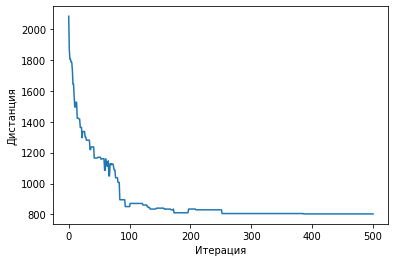

In [132]:
best = geneticAlgorithm(population = cityList, popSize = popSize, eliteSize = elite_size, mutationRate = mutationRate,generations = iters)

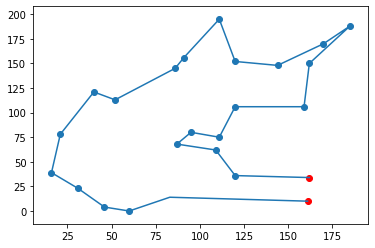

In [133]:
x = []
y = []

for i in range(len(best)):
    arr = best[i].__repr__(formats ='array')
    x.append(arr[0])
    y.append(arr[1])


plt.plot(x,y)
plt.scatter(x[0],y[0],c='red')
plt.scatter(x[len(best)-1],y[len(best)-1],c='red')
plt.scatter(x[1:len(best)-2],y[1:len(best)-2])

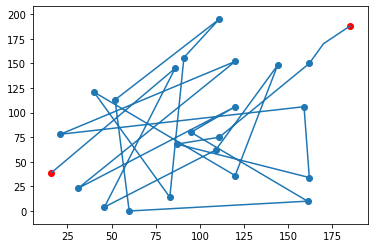

In [134]:
x = []
y = []

for i in range(len(cityList)):
    arr = cityList[i].__repr__(formats ='array')
    x.append(arr[0])
    y.append(arr[1])

plt.plot(x,y)
plt.scatter(x[0],y[0],c='red')
plt.scatter(x[len(best)-1],y[len(best)-1],c='red')
plt.scatter(x[1:len(best)-2],y[1:len(best)-2])